### 获得前n个主成分 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0., 10., size = 100)

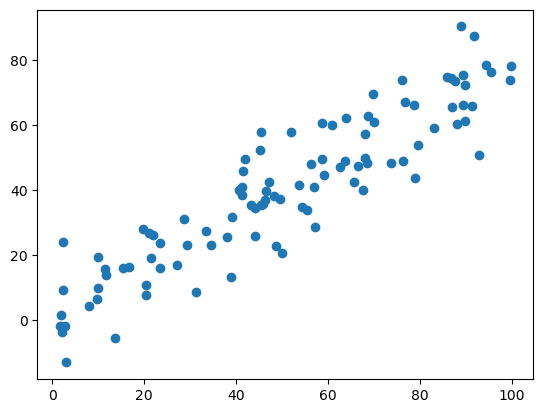

In [4]:
plt.scatter(X[:,0],X[:,1] )
plt.show()

In [5]:
def demean(X):
  return X- np.mean(X, axis=0)

X = demean(X)

def f(w, X):
  return  np.sum((X.dot(w))**2) / len(X)

def df(w, X):
  return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
  return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
  cur_iter = 0
  w = direction(initial_w)
  while cur_iter < n_iters:
    gradient = df(w, X)
    last_w = w
    w = w + eta * gradient
    w = direction(w) # 注意1：每次求一个单位方向
    if abs(f(w,X) - f(last_w, X)) < epsilon:
      break
    
    cur_iter += 1
  
  return w

In [6]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)

In [7]:
w


array([0.77287294, 0.63456081])

In [8]:
X2 = np.empty(X.shape)
# for i in range(len(X)):
#   X2[i] = X[i] - X[i].dot(w) * w
X2 = X - X - X.dot(w).reshape(-1, 1)* w

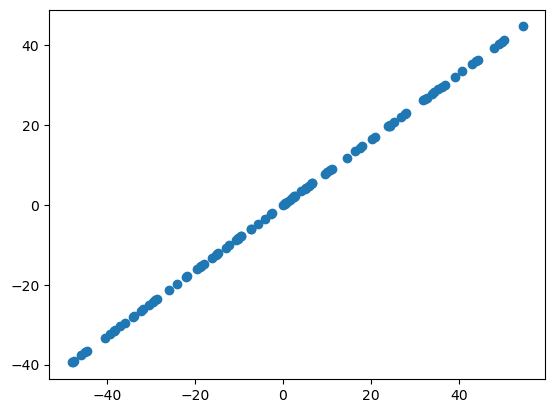

In [9]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [10]:
w2 = first_component(X2, initial_w, eta)

In [11]:
w2

array([0.77287292, 0.63456083])

In [12]:
w.dot(w2)

0.9999999999999993

In [13]:
def first_n_components(n, X, eta=0.01, n_iters = 1e4, epsilon=1e-8):
  
  X_pca = X.copy()
  X_pca = demean(X_pca)
  res = []
  for i in range(n):
    initial_w = np.random.random(X_pca.shape[1])
    w = first_component(X_pca, initial_w, eta)
    res.append(w)
     
    X_pca = X_pca - X_pca.dot(w).reshape(-1, 1)*2
  
  return res

In [14]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0., 10., size = 100)
first_n_components(2,X)

[array([0.77249422, 0.63502179]), array([0.6671805 , 0.74489609])]

In [15]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0., 10., size = 100)

In [16]:
from playML.PCA import PCA
# from ..playML.PCA import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [17]:
pca.components_

array([[0.77385055, 0.63336824],
       [0.66666029, 0.74536169]])

In [18]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [19]:
X_reduction = pca.transform(X)

In [21]:
X_reduction.shape

(100, 1)

In [22]:
X_restore = pca.inverse_transform(X_reduction)

In [24]:
X_restore.shape

(100, 2)

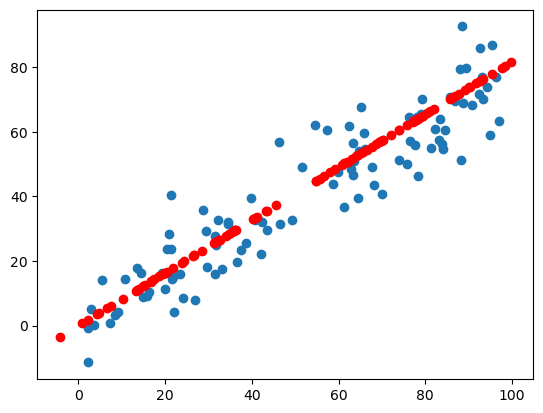

In [25]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(X_restore[:,0], X_restore[:,1], color='r')
plt.show()